In [1]:
import os
import re
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

import nltk;
nltk.download('stopwords');
from nltk.corpus import stopwords;
from nltk.stem import WordNetLemmatizer
from nltk.stem import LancasterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
# Since i have uploaded the data to my Google Drive
# I have to have that path

project_path = '/content/drive/My Drive/Colab Notebooks/Project/NLP/'

In [0]:
# Since read_csv method can now read csv from zip as well
# loading the csv file

blog_text_df = pd.read_csv(project_path + 'blog-authorship-corpus.zip')

In [4]:
# Checking the shape of of dataset

blog_text_df.shape

(681284, 7)

In [5]:
# Checking few records to look at the dataset

blog_text_df.head(8)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...
5,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",I had an interesting conversation...
6,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",Somehow Coca-Cola has a way of su...
7,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004","If anything, Korea is a country o..."


In [6]:
# concise summary of dataset

blog_text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681284 entries, 0 to 681283
Data columns (total 7 columns):
id        681284 non-null int64
gender    681284 non-null object
age       681284 non-null int64
topic     681284 non-null object
sign      681284 non-null object
date      681284 non-null object
text      681284 non-null object
dtypes: int64(2), object(5)
memory usage: 36.4+ MB


In [7]:
# checking for the null values

blog_text_df.isna().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

In [8]:
# checking the number of signs and their value counts
blog_text_df['sign'].value_counts()

Cancer         65048
Aries          64979
Taurus         62561
Libra          62363
Virgo          60399
Scorpio        57161
Pisces         54053
Leo            53811
Gemini         51985
Sagittarius    50036
Aquarius       49687
Capricorn      49201
Name: sign, dtype: int64

In [9]:
# Checking for the duplicate rows

duplicate_rows_df = blog_text_df[blog_text_df.duplicated(keep='first') == True]
print(duplicate_rows_df.shape)

(4686, 7)


In [10]:
# Checking the duplicated rows

duplicate_rows_df.head(20)

,id,gender,age,topic,sign,date,text
2310,589736,male,35,Technology,Aries,"05,August,2004",hey guys - i had the flu today - th...
3469,589736,male,35,Technology,Aries,"05,August,2004",
3578,589736,male,35,Technology,Aries,"05,August,2004",
3626,589736,male,35,Technology,Aries,"05,August,2004",
3627,589736,male,35,Technology,Aries,"05,August,2004",
3637,589736,male,35,Technology,Aries,"05,August,2004",
3735,3698079,female,14,indUnk,Aquarius,"21,June,2004",Around 1:00 my mom picked me ...
3736,3698079,female,14,indUnk,Aquarius,"21,June,2004",Around 1:00 my mom picked me ...
3829,3543234,male,14,indUnk,Scorpio,"07,June,2004",ZmX: I hate these geek 20 year olds...
4275,766556,female,34,indUnk,Sagittarius,"09,January,2003",Not a happy girl Working like crazy a...


In [0]:
# removing all the duplicate rows from the df

blog_text_df = blog_text_df[blog_text_df.duplicated(keep='first') == False]

In [12]:
blog_text_df

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...
...,...,...,...,...,...,...,...
681279,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan, I could write some really ..."
681280,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan, 'I have the second yeast i..."
681281,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan, Your 'boyfriend' is fuckin..."
681282,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan: Just to clarify, I am as..."


In [13]:
#Cross check if any duplicate rows still there

blog_text_df[blog_text_df.duplicated()]

,id,gender,age,topic,sign,date,text


In [0]:
# releasing some memory
del duplicate_rows_df

In [15]:
blog_text_df['sign'].value_counts()

Aries          64758
Cancer         64709
Libra          62146
Taurus         61393
Virgo          60200
Scorpio        56597
Pisces         53657
Leo            53603
Gemini         51309
Sagittarius    49831
Aquarius       49422
Capricorn      48973
Name: sign, dtype: int64

In [16]:
(blog_text_df['age'].value_counts())

17    80670
24    79809
23    72448
16    72228
25    66803
26    55012
27    45745
15    41559
14    27200
34    21304
33    17532
35    17275
36    14185
13    12132
37     9280
38     7187
39     5468
40     4998
45     4468
43     4195
41     3714
48     3545
42     2875
46     2730
47     2204
44     2032
Name: age, dtype: int64

In [17]:
nltk.download('words')
from nltk.corpus import words
setofwords = set(words.words())


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [18]:
print(len(setofwords))
setofwords

235892


{'torso',
 'gaysome',
 'unsundered',
 'alertness',
 'Turonian',
 'Octavian',
 'Arian',
 'dipterad',
 'unspirit',
 'dampishness',
 'imperialization',
 'kebab',
 'loxolophodont',
 'repellency',
 'Myxospongiae',
 'uncapacious',
 'bodkinwise',
 'peril',
 'prolongably',
 'transmutability',
 'poduran',
 'mollycot',
 'nonmodern',
 'ponderomotive',
 'Ethiopic',
 'bestick',
 'Elsholtzia',
 'upclimb',
 'Chilostomata',
 'unreposefulness',
 'electrophoresis',
 'marchioness',
 'localizer',
 'mesentoderm',
 'musketeer',
 'smoky',
 'phaeophycean',
 'unimplored',
 'imitatrix',
 'lanner',
 'polysyndeton',
 'homologic',
 'hornish',
 'merismatic',
 'needly',
 'premiate',
 'diabolically',
 'forthtell',
 'pollenite',
 'keratonosus',
 'fragmented',
 'disappointment',
 'rober',
 'ladyhood',
 'specks',
 'heinousness',
 'coalyard',
 'brotherliness',
 'tapestring',
 'galactopyra',
 'char',
 'polyneuritic',
 'nidget',
 'oligometochic',
 'jargon',
 'turpitude',
 'dismissible',
 'downheartedness',
 'resurgency',
 

In [19]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'didn', 'with', 'and', 'being', 'against', 't', 'when', 'how', 'i', 'herself', 'on', 'very', 'more', "shouldn't", 'wouldn', 'same', 'our', 'she', 'hadn', "don't", 'you', 'mightn', 's', 'my', 'aren', 'both', 'weren', 'no', 'while', 'was', 'some', 'am', 'again', 'a', 'does', 'did', "hadn't", 'your', 'theirs', 'an', 'but', 'is', 'off', 'needn', 'at', 'can', "wouldn't", 'there', 'until', 'who', 'will', 'd', 'be', 'any', 'to', 'down', 'in', 'yourself', 'if', 'after', 'then', 'which', 'that', 'isn', "needn't", 'or', 'only', 'hers', "you're", "weren't", 'this', 'them', 'those', 'has', 'not', 'above', 'he', "that'll", 'over', 'are', "hasn't", 'too', 'were', 'now', 'm', 'couldn', 'because', 'through', 'where', 'y', 'other', 'yourselves', 'been', "mightn't", 'shan', "you've", 'the', 'their', 'him', 'have', 'so', "isn't", 'himself', 've', 'here', 'll', 'had', 'during', 'all', "didn't", "haven't", 'ma', 'for', 'out', 'of', 'up', 'once', 'don', 'what', "doesn't", 'her', 'under', 'themselves', 'it'

In [20]:
print(set(string.punctuation))
stop_words.update(set(string.punctuation))
print(stop_words)

{'(', '>', ']', '"', '=', '!', '_', '*', '?', ')', '\\', '@', '.', '^', '[', '{', '|', '%', '~', '`', '/', ';', '$', '<', '#', ':', '-', '+', '&', "'", '}', ','}
{'didn', 'with', 'and', 'being', 'against', 't', 'when', 'how', 'i', '=', 'herself', 'on', 'very', 'more', "shouldn't", 'wouldn', 'same', 'our', 'she', 'hadn', "don't", 'you', 'mightn', 's', '@', '.', '{', 'my', '|', '/', 'aren', 'both', 'weren', 'no', 'while', '#', 'was', 'some', ':', 'am', 'again', 'a', 'does', '-', 'did', "hadn't", 'your', 'theirs', 'an', 'but', 'is', 'off', 'needn', "'", 'at', 'can', '(', "wouldn't", 'there', 'until', 'who', 'will', 'd', 'be', 'any', 'to', 'down', 'in', 'yourself', 'if', 'after', 'then', 'which', 'that', 'isn', "needn't", 'or', 'only', 'hers', '^', "you're", "weren't", '`', '$', 'this', 'them', 'those', 'has', 'not', 'above', 'he', "that'll", 'over', 'are', "hasn't", 'too', 'were', 'now', 'm', 'couldn', 'because', 'through', '>', 'where', 'y', ']', 'other', '"', 'yourselves', 'been', "migh

In [0]:
lancaster = LancasterStemmer()

In [23]:
blog_text_df[blog_text_df['text'].apply(lambda x: len(x)) < 20]['text']

4200                         
4816                         
4927             ::sigh::    
4940                         
4982                         
                 ...         
676686             urlLink   
678818                       
679482                       
679961                       
680587                       
Name: text, Length: 1884, dtype: object

In [24]:
' '.join(blog_text_df['text'][4200].split())

''

In [0]:
def remove_punctuation_space_stop_words_number_lowercase(input_str):
    '''
    Function removes any html tags, characters other than A-Z and a-z.
    Also, removes unneccessary punctuations and stop words from the word corpus
    Returns sentence after removal of all.
    '''
    input_str = re.sub(r'^https?:\/\/<>.*[\r\n]*','',input_str,flags=re.MULTILINE) #Removing Special characters characters
    input_str = re.sub(r"[^A-Za-z]"," ",input_str) # Keeping A-Z and a-z removing rest
    tokens = input_str.translate(str.maketrans("","",string.punctuation)).split()
    tokens = [word for word in tokens if word.isalpha()]
    result = [lancaster.stem(w.lower()) for w in tokens if (not w in stop_words) and (not w.isdigit() )]
    return ' '.join(result)
    # return result (When you require tokens)

In [28]:
# Check the text
print(blog_text_df['text'][0])

# Checking the transformation
print(remove_punctuation_space_stop_words_number_lowercase(blog_text_df['text'][0]))

           Info has been found (+/- 100 pages, and 4.5 MB of .pdf files) Now i have to wait untill our team leader has processed it and learns html.         
info found pag mb pdf fil now wait until team lead process learn html


In [0]:
# Applying the function to all rows and saving to new column in order to see the difference

blog_text_df['clean_text'] = blog_text_df['text'].apply(lambda row: remove_punctuation_space_stop_words_number_lowercase(row))

In [31]:
# Checking Sample

blog_text_df[['clean_text', 'text']].sample(10)

,clean_text,text
116408,a brief imagin interview writ what new week it...,"A brief, imaginary interview with the..."
197014,first i lik clar i gav lick peopl nd half lent...,"First off, I'd like to clarify that I g..."
69791,wok morn bread breakfast today haf go town int...,i woke up at 9+ this morning... i ha...
64747,wel try cool new serv thi post most test mor b...,"Well, just trying out this cool new ser..."
555811,wel laundry room flood decid fault ro unit dev...,"well, the laundry room is flooded..."
477317,i thought would good outlet let i nev writ i k...,I thought that this would be a good out...
396575,word bubbl lip thought pow control noth wish c...,there are more words bubbling out from ...
331542,the econom inform overview urllink aid situ ri...,The Economist has an informative overvi...
300092,about month ago i develop sort blood cyst left...,About 6-7 months ago I developed so...
139992,you ok work saturday morn real bor ther noth i...,You'll be OK Working on a Satu...


In [32]:
blog_text_df[['clean_text', 'text']].iloc[674429]

clean_text    feel real pathet today dunno happy bout im doi...
text                     i feel real pathetic today.  i dunn...
Name: 679103, dtype: object

In [33]:
blog_text_df.dtypes

id             int64
gender        object
age            int64
topic         object
sign          object
date          object
text          object
clean_text    object
dtype: object

In [0]:
blog_text_df['age'] = blog_text_df['age'].astype(str)

In [35]:
blog_text_df.dtypes

id             int64
gender        object
age           object
topic         object
sign          object
date          object
text          object
clean_text    object
dtype: object

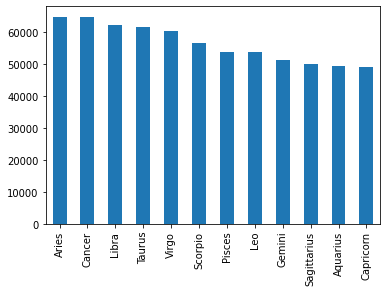

In [63]:
blog_text_df[ 'sign'].value_counts().plot(kind='bar')

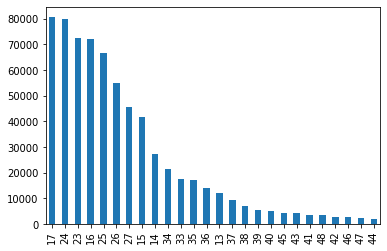

In [64]:
blog_text_df['age'].value_counts().plot(kind='bar')

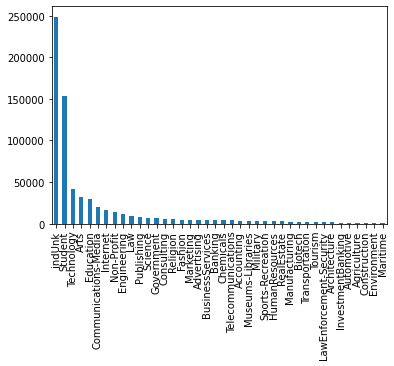

In [65]:
blog_text_df['topic'].value_counts().plot(kind='bar')

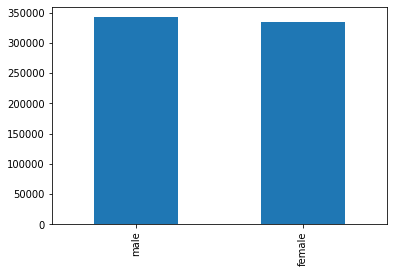

In [36]:
blog_text_df[ 'gender'].value_counts().plot(kind='bar')

In [0]:
# From the above plots we can see that there is uneven distribution among the target column
# i.e. the targetcolumns do not have equal distribution there is skrewness in the target columns
# which might result in uneven classification i.e. for some classes it performs good but some it does not

In [0]:
blog_text_df['topic_lower'] = blog_text_df['topic'].apply(lambda row: row.lower())

In [0]:
blog_text_df['sign_lower'] = blog_text_df['sign'].apply(lambda row: row.lower())

In [39]:
blog_text_df.head()

,id,gender,age,topic,sign,date,text,clean_text,topic_lower,sign_lower
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,...",info found pag mb pdf fil now wait until team ...,student,leo
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...,thes team memb drew van der laag urllink mail ...,student,leo
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...,in het kad van kernfusy op aard maak je eig wa...,student,leo
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!,test test,student,leo
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...,thank yahoo toolb i capt url popup mean i show...,investmentbanking,aquarius


In [0]:
blog_text_df['labels'] = blog_text_df[['gender', 'age', 'topic_lower', 'sign_lower']].values.tolist()

In [41]:
blog_text_df.head(5)

,id,gender,age,topic,sign,date,text,clean_text,topic_lower,sign_lower,labels
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,...",info found pag mb pdf fil now wait until team ...,student,leo,"[male, 15, student, leo]"
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...,thes team memb drew van der laag urllink mail ...,student,leo,"[male, 15, student, leo]"
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...,in het kad van kernfusy op aard maak je eig wa...,student,leo,"[male, 15, student, leo]"
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!,test test,student,leo,"[male, 15, student, leo]"
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...,thank yahoo toolb i capt url popup mean i show...,investmentbanking,aquarius,"[male, 33, investmentbanking, aquarius]"


In [42]:
blog_text_df.dtypes

id              int64
gender         object
age            object
topic          object
sign           object
date           object
text           object
clean_text     object
topic_lower    object
sign_lower     object
labels         object
dtype: object

In [44]:
blog_text_df.drop(['gender', 'age', 'topic', 'sign', 'id', 'text', 'date','topic_lower', 'sign_lower'], axis=1, inplace=True)
blog_text_df.head()

,clean_text,labels
0,info found pag mb pdf fil now wait until team ...,"[male, 15, student, leo]"
1,thes team memb drew van der laag urllink mail ...,"[male, 15, student, leo]"
2,in het kad van kernfusy op aard maak je eig wa...,"[male, 15, student, leo]"
3,test test,"[male, 15, student, leo]"
4,thank yahoo toolb i capt url popup mean i show...,"[male, 33, investmentbanking, aquarius]"


In [0]:
blog_text_df.to_csv( project_path + 'cleaned_blogtext_umang_22_march.csv', index= False)
# Saving the clean dataframe will save us the next time we start using the file

In [0]:
#loading the saved file
blog_text_df = pd.read_csv(project_path + 'cleaned_blogtext_umang_22_march.csv')

In [45]:
blog_text_df.head(8)

,clean_text,labels
0,info found pag mb pdf fil now wait until team ...,"[male, 15, student, leo]"
1,thes team memb drew van der laag urllink mail ...,"[male, 15, student, leo]"
2,in het kad van kernfusy op aard maak je eig wa...,"[male, 15, student, leo]"
3,test test,"[male, 15, student, leo]"
4,thank yahoo toolb i capt url popup mean i show...,"[male, 33, investmentbanking, aquarius]"
5,i interest convers dad morn we talk kor put mo...,"[male, 33, investmentbanking, aquarius]"
6,somehow coc col way sum thing wel in ear flag ...,"[male, 33, investmentbanking, aquarius]"
7,if anyth kore country extrem everyth seem fad ...,"[male, 33, investmentbanking, aquarius]"


In [46]:
blog_text_df['clean_text'].isna().sum()

0

In [47]:
blog_text_df.dtypes

clean_text    object
labels        object
dtype: object

In [48]:
blog_text_df[(blog_text_df['clean_text'].map(lambda x: len(x)) < 2)].sample(25)

,clean_text,labels
47376,,"[female, 17, student, capricorn]"
103278,,"[male, 24, businessservices, virgo]"
76774,,"[male, 24, indunk, pisces]"
120052,,"[male, 24, internet, pisces]"
678161,,"[male, 26, indunk, virgo]"
295535,,"[female, 14, indunk, taurus]"
66697,,"[male, 26, indunk, taurus]"
131655,,"[male, 16, communications-media, scorpio]"
175089,,"[male, 13, science, sagittarius]"
547199,,"[female, 37, indunk, libra]"


In [49]:
print(sorted(blog_text_df[(blog_text_df['clean_text'].map(lambda x: len(x)) == 0)]['clean_text']))
print(sorted(blog_text_df[(blog_text_df['clean_text'].map(lambda x: len(x)) == 1)]['clean_text']))
print(sorted(blog_text_df[(blog_text_df['clean_text'].map(lambda x: len(x)) == 2)]['clean_text']))

['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',

In [81]:
blog_text_df['clean_text'][674429].isalpha() # text in 674429 --> 珠珠

False

In [82]:
blog_text_df[(blog_text_df['clean_text'].apply(lambda x: len(x)) < 3) == True]

,clean_text,labels
716,,"[male, 15, Science, Libra]"
1760,ay,"[male, 35, Technology, Aries]"
2047,it,"[male, 35, Technology, Aries]"
2426,ol,"[male, 35, Technology, Aries]"
3277,,"[male, 35, Technology, Aries]"
...,...,...
680587,,"[male, 26, indUnk, Virgo]"
680777,,"[female, 15, indUnk, Aquarius]"
680802,,"[female, 15, indUnk, Aquarius]"
680934,,"[male, 17, Student, Taurus]"


In [0]:
blog_text_df = blog_text_df[(blog_text_df['clean_text'].apply(lambda x: len(x)) < 3) == False]

In [83]:
print(sorted(blog_text_df[(blog_text_df['clean_text'].map(lambda x: len(x)) == 0)]['clean_text']))
print(sorted(blog_text_df[(blog_text_df['clean_text'].map(lambda x: len(x)) == 1)]['clean_text']))
print(sorted(blog_text_df[(blog_text_df['clean_text'].map(lambda x: len(x)) == 2)]['clean_text']))

[]
[]
[]


In [51]:
# checking the shape
blog_text_df.shape

(673165, 2)

In [25]:
blog_text_df.head()

,clean_text,labels
0,info found pag mb pdf fil now wait until team ...,"['male', '15', 'Student', 'Leo']"
1,thes team memb drew van der laag urllink mail ...,"['male', '15', 'Student', 'Leo']"
2,in het kad van kernfusy op aard maak je eig wa...,"['male', '15', 'Student', 'Leo']"
3,test test,"['male', '15', 'Student', 'Leo']"
4,thank yahoo toolb i capt url popup mean i show...,"['male', '33', 'InvestmentBanking', 'Aquarius']"


In [0]:
def only_english_words(inp_str):
    '''

    '''
    # text = inp_str.split()
    return " ".join(w for w in nltk.wordpunct_tokenize(inp_str) if w in setofwords)

In [53]:
print(blog_text_df['clean_text'][10])
print(only_english_words(blog_text_df['clean_text'][10]))

ah kor langu look difficult first fig read hanguel kore surpr easy learn alphabet charact seem easy then vocab start oh then backward us sent structure yik lucky many opt us slow wit foreign tak langu of cours i could list urllink joongang artic say lot resourc urllink wel guy mot jeon ji hyun latest someth act star movy cfs i hear mean commerc feat posit i saw latest movy sunday night it hard describ nam engl vert windstruck kor vert yeochinso short ne yeojachingu rul sogayhamnid i lik introduc girlfriend surpr titl mak sens if lik websit kor engl look quit good act urllink the movy shown the subtitl spec tim info urllink for list many the seo click urllink urllink her gre reason learn kor i already marry i went foreign wel loc kor nat cours kor had tak pict i hav put urllink her movy hof bar upd a bud min pass urllink link it giordano ad app not air kore noth xxx sens sort
ah kor look difficult first fig read kore easy learn alphabet seem easy then start oh then backward us sent stru

In [54]:
blog_text_df['clean_text'] = blog_text_df['clean_text'].apply(lambda row: only_english_words(row))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
# blog_text_df = blog_text_df[(blog_text_df['clean_text'].apply(lambda x: len(x)) < 2) == False]

In [55]:
print(sorted(blog_text_df[(blog_text_df['clean_text'].map(lambda x: len(x)) == 0)]['clean_text']))
print(sorted(blog_text_df[(blog_text_df['clean_text'].map(lambda x: len(x)) == 1)]['clean_text']))
print(sorted(blog_text_df[(blog_text_df['clean_text'].map(lambda x: len(x)) == 2)]['clean_text']))

['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',

In [0]:
blog_text_df = blog_text_df[(blog_text_df['clean_text'].apply(lambda x: len(x)) < 3) == False]

In [57]:
print(sorted(blog_text_df[(blog_text_df['clean_text'].map(lambda x: len(x)) == 0)]['clean_text']))
print(sorted(blog_text_df[(blog_text_df['clean_text'].map(lambda x: len(x)) == 1)]['clean_text']))
print(sorted(blog_text_df[(blog_text_df['clean_text'].map(lambda x: len(x)) == 2)]['clean_text']))

[]
[]
[]


In [58]:
blog_text_df.shape

(664239, 2)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(blog_text_df['clean_text'], blog_text_df['labels'], test_size=0.40, random_state=412)

In [60]:
print(X_train.shape)
print(y_train.shape)

(398543,)
(398543,)


In [61]:
print(X_test.shape)
print(y_test.shape)

(265696,)
(265696,)


In [0]:
del blog_text_df

In [0]:
# instantiate the vectorizer

count_vect = CountVectorizer(ngram_range=(1,2), min_df=3, max_df=24000, max_features=3000, lowercase=False)

In [69]:
count_vect.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=False, max_df=24000, max_features=3000, min_df=3,
                ngram_range=(1, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [0]:
X_train_dtm = count_vect.transform(X_train)

In [0]:
X_test_dtm = count_vect.transform(X_test)

In [72]:
print(count_vect.get_feature_names())

['abandon', 'abort', 'about', 'absorb', 'access', 'accompany', 'accord', 'account', 'ach', 'across', 'act get', 'act on', 'act real', 'act think', 'actress', 'ad', 'adapt', 'addict', 'address', 'adjust', 'admit', 'adopt', 'adult', 'advert', 'affair', 'affect', 'afford', 'afraid', 'aft', 'aft went', 'afternoon', 'afterward', 'again', 'aggress', 'ago', 'agree', 'ah', 'ahead', 'ai', 'aid', 'aim', 'aint', 'air', 'airport', 'ak', 'ako', 'ala', 'alarm', 'alb', 'album', 'alcohol', 'alert', 'allow', 'along', 'along way', 'already know', 'alright', 'also got', 'also think', 'also want', 'alt', 'altern', 'although', 'alway get', 'alway seem', 'alway want', 'aly', 'am', 'am am', 'amend', 'among', 'amongst', 'amount', 'amy', 'an', 'and also', 'and fin', 'and get', 'and got', 'and know', 'and on', 'and real', 'and say', 'and think', 'and want', 'and ye', 'angel', 'angry', 'ann', 'annoy', 'anonym', 'ant', 'any', 'anybody', 'anyhow', 'anyway got', 'apart', 'appear', 'apply', 'appoint', 'approach', 'a

In [73]:
count_vect.vocabulary_

{'cur': 528,
 'begin': 195,
 'key': 1322,
 'focus': 850,
 'toward': 2664,
 'half': 1088,
 'meant': 1542,
 'self': 2192,
 'ory': 1773,
 'moon': 1581,
 'spent': 2328,
 'deep': 581,
 'aw': 138,
 'prep': 1897,
 'rel': 2039,
 'symbol': 2435,
 'bud': 301,
 'about': 2,
 'mar': 1518,
 'sign': 2238,
 'aggress': 33,
 'planet': 1861,
 'posit': 1886,
 'aspect': 116,
 'draw': 678,
 'follow': 853,
 'due': 694,
 'lead': 1420,
 'energy': 728,
 'quick': 1942,
 'leap': 1423,
 'prop': 1923,
 'comb': 435,
 'block': 237,
 'deny': 590,
 'soul': 2313,
 'the first': 2500,
 'on act': 1721,
 'get thing': 954,
 'hey': 1137,
 'felt': 802,
 'moth': 1588,
 'thou': 2588,
 'per': 1827,
 'marry': 1524,
 'baby': 144,
 'sist': 2246,
 'hit': 1150,
 'claim': 411,
 'needless': 1648,
 'brain': 277,
 'arm': 107,
 'lung': 1496,
 'injury': 1222,
 'par': 1798,
 'den': 588,
 'depress': 593,
 'th': 2480,
 'dead': 572,
 'suck': 2407,
 'sex': 2199,
 'hold': 1154,
 'hum': 1183,
 'contact': 464,
 'la': 1380,
 'hug': 1181,
 'strength'

In [74]:
X_train_dtm

<398543x3000 sparse matrix of type '<class 'numpy.int64'>'
	with 11406800 stored elements in Compressed Sparse Row format>

In [75]:
X_train_dtm.get_shape()

(398543, 3000)

In [0]:
multi_label_binarizer = MultiLabelBinarizer()

In [64]:
y_train[0]

['male', '15', 'student', 'leo']

In [65]:
multi_label_binarizer.fit(y_train)

MultiLabelBinarizer(classes=None, sparse_output=False)

In [0]:
y_train_labeled = multi_label_binarizer.transform(y_train)

In [0]:
y_test_labeled = multi_label_binarizer.transform(y_test)

In [66]:
multi_label_binarizer.classes_

array(['13', '14', '15', '16', '17', '23', '24', '25', '26', '27', '33',
       '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44',
       '45', '46', '47', '48', 'accounting', 'advertising', 'agriculture',
       'aquarius', 'architecture', 'aries', 'arts', 'automotive',
       'banking', 'biotech', 'businessservices', 'cancer', 'capricorn',
       'chemicals', 'communications-media', 'construction', 'consulting',
       'education', 'engineering', 'environment', 'fashion', 'female',
       'gemini', 'government', 'humanresources', 'indunk', 'internet',
       'investmentbanking', 'law', 'lawenforcement-security', 'leo',
       'libra', 'male', 'manufacturing', 'maritime', 'marketing',
       'military', 'museums-libraries', 'non-profit', 'pisces',
       'publishing', 'realestate', 'religion', 'sagittarius', 'science',
       'scorpio', 'sports-recreation', 'student', 'taurus', 'technology',
       'telecommunications', 'tourism', 'transportation', 'virgo'],
      dtype

In [76]:
y_train_labeled[0]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [0]:
classifier_model = OneVsRestClassifier(LogisticRegression(solver = 'lbfgs', max_iter=5000, warm_start=True, verbose=1, n_jobs=-1))

In [78]:
classifier_model.fit(X_train_dtm, y_train_labeled)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   51.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   50.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   26.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   20.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   17.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   15.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=5000,
                                                 multi_class='auto', n_jobs=-1,
                                                 penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=1, warm_start=True),
                    n_jobs=None)

In [0]:
# save the model to disk
import pickle
filename = project_path + 'finalized_model_22_03.sav'
pickle.dump(classifier_model, open(filename, 'wb'))

In [80]:
classifier_model.score(X_test_dtm, y_test_labeled)

0.0023447850174635673

In [81]:
classifier_model.score(X_train_dtm, y_train_labeled)

0.0031439518445939333

In [0]:
# Tried various parameter on the dataset but didn't get the accurracy. With default n_gram(1,2) i ran the code for 12 hours on colab but it never got finished.
# So at last using this approach. 

In [0]:
y_pred_class = classifier_model.predict(X_test_dtm)

In [83]:
 #calculate accuracy of class predictions
from sklearn import metrics
# Accuracy Score 
metrics.accuracy_score(y_test_labeled, y_pred_class)

0.0023447850174635673

In [84]:
# Classification report  CNN model
print(metrics.classification_report(y_test_labeled, y_pred_class))

              precision    recall  f1-score   support

           0       0.17      0.01      0.02      4736
           1       0.39      0.03      0.06     10701
           2       0.35      0.03      0.05     16324
           3       0.40      0.03      0.05     28369
           4       0.41      0.03      0.06     31609
           5       0.29      0.01      0.01     28417
           6       0.36      0.01      0.02     31014
           7       0.39      0.01      0.02     26650
           8       0.27      0.00      0.01     21550
           9       0.32      0.01      0.02     17975
          10       0.24      0.01      0.03      6929
          11       0.50      0.04      0.08      8340
          12       0.33      0.02      0.04      6799
          13       0.16      0.01      0.01      5550
          14       0.23      0.02      0.04      3632
          15       0.12      0.01      0.02      2806
          16       0.08      0.01      0.01      2172
          17       0.46    

In [0]:
# Above report display everything in one place
# Still find the required fields

In [85]:
print("F1: " , (metrics.f1_score(y_test_labeled, y_pred_class, average='micro')))
print("F1_macro: " , (metrics.f1_score(y_test_labeled, y_pred_class, average='macro')))
print("Recall micro: " , metrics.recall_score(y_test_labeled, y_pred_class, average='micro'))
print("F1_micro: " , (metrics.f1_score(y_test_labeled, y_pred_class, average='micro')))
print("Recall macro: " , metrics.recall_score(y_test_labeled, y_pred_class, average='macro'))
print("Average Precision: " ,(metrics.average_precision_score(y_test_labeled, y_pred_class, average='micro')))
print("Accuracy:" , (metrics.accuracy_score(y_test_labeled, y_pred_class))) 

F1:  0.27168274683310256
F1_macro:  0.0504192842672045
Recall micro:  0.1755869489943394
F1_micro:  0.27168274683310256
Recall macro:  0.03599077914671226
Average Precision:  0.1465932628024157
Accuracy: 0.0023447850174635673


In [70]:
multi_label_binarizer.classes_

array([' ', "'", ',', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       '9', 'A', 'B', 'C', 'E', 'F', 'G', 'H', 'I', 'L', 'M', 'N', 'P',
       'R', 'S', 'T', 'U', 'V', '[', ']', 'a', 'b', 'c', 'd', 'e', 'f',
       'g', 'h', 'i', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't',
       'u', 'v', 'w', 'y'], dtype=object)

In [86]:
y_test_pred_inversed = multi_label_binarizer.inverse_transform(y_pred_class)
y_test_inversed = multi_label_binarizer.inverse_transform(y_test_labeled)
for i in range(15,20):
    print( 'True labels:\t{}\nPredicted labels:\t{}\n\n'.format(
        
        ','.join(y_test_inversed[i]),
        ','.join(y_test_pred_inversed[i])
    ))

True labels:	15,male,scorpio,student
Predicted labels:	female


True labels:	17,aquarius,male,sports-recreation
Predicted labels:	17,indunk,male,student


True labels:	26,male,museums-libraries,taurus
Predicted labels:	male


True labels:	34,male,non-profit,taurus
Predicted labels:	female,indunk


True labels:	14,gemini,male,student
Predicted labels:	male




In [0]:
# ---------------------PLEASE IGNORE CODE BELOW THIS LINE. I WAS TRYING SAME THING WITH TENSORFLOW ON SAME DATA----------------------------------------------

In [118]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

TensorFlow 2.x selected.


In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
tokenizer = Tokenizer(num_words=5000)

In [0]:
tokenizer.fit_on_texts(X_train)

In [0]:
X_train_d = tokenizer.texts_to_sequences(X_train)

In [0]:
X_test_d = tokenizer.texts_to_sequences(X_test)

In [0]:
vocab_size = len(tokenizer.word_index) + 1
maxlen = 2000

In [127]:
vocab_size

18770

In [0]:
X_train_d = pad_sequences(X_train_d, padding='post', maxlen=maxlen)

In [1]:
X_test_d = pad_sequences(X_test_d, padding='post', maxlen=maxlen)

NameError: ignored

In [2]:
!wget --header="Host: nlp.stanford.edu" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/69.0.3497.100 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8" --header="Accept-Language: en-US,en;q=0.9" --header="Cookie: _ga=GA1.2.456156586.1539718115; _gid=GA1.2.491677602.1539718115; _gat=1" --header="Connection: keep-alive" "https://nlp.stanford.edu/data/glove.6B.zip" -O "glove.6B.zip" -c


--2020-03-22 12:24:09--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-03-22 12:24:09--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  2.00MB/s    in 6m 27s  

2020-03-22 12:30:36 (2.13 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]



In [3]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [131]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

glove_file = open('/content/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

FileNotFoundError: ignored

In [0]:
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense
from tensorflow.keras.layers import Flatten, LSTM
from tensorflow.keras.layers import GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Concatenate

In [130]:
deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(128)(embedding_layer)
dense_layer_1 = Dense(6, activation='sigmoid')(LSTM_Layer_1)
model = Model(inputs=deep_inputs, outputs=dense_layer_1)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

NameError: ignored

In [0]:
sent = ['i live dog', 'i hate corona', 'nature hate humans', 'i live pune']

In [0]:
tokenizer.fit_on_texts(sent)

In [0]:
tokenizer.word_counts

OrderedDict([('i', 3),
             ('live', 2),
             ('dog', 1),
             ('hate', 2),
             ('corona', 1),
             ('nature', 1),
             ('humans', 1),
             ('pune', 1)])

In [0]:
tokenizer.word_index

{'<00V>': 1,
 'corona': 6,
 'dog': 5,
 'hate': 4,
 'humans': 8,
 'i': 2,
 'live': 3,
 'nature': 7,
 'pune': 9}

In [0]:
sent = ['i live dog', 'i hate corona', 'nature hate humans', 'i not region pune']

In [0]:
print(tokenizer.texts_to_sequences(sent))

[[2, 3, 5], [2, 4, 6], [7, 4, 8], [2, 1, 1, 9]]


In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
pad_sequences(tokenizer.texts_to_sequences(sent))

array([[0, 2, 3, 5],
       [0, 2, 4, 6],
       [0, 7, 4, 8],
       [2, 1, 1, 9]], dtype=int32)

In [0]:
pad_sequences(tokenizer.texts_to_sequences(sent), padding='post', truncating='post')

array([[2, 3, 5, 0],
       [2, 4, 6, 0],
       [7, 4, 8, 0],
       [2, 1, 1, 9]], dtype=int32)

In [0]:
pad_sequences(tokenizer.texts_to_sequences(sent), padding='post', truncating='post', maxlen=3)

array([[2, 3, 5],
       [2, 4, 6],
       [7, 4, 8],
       [2, 1, 1]], dtype=int32)

In [0]:
model = tf.keras.Sequential()

In [0]:
model.add(tf.keras.layers.Embedding())